# Exercise 4.1

Matrix A created with shape: (10, 6)
Matrix A:
[[ 0.5  -0.14  0.65  1.52 -0.23 -0.23]
 [ 1.58  0.77 -0.47  0.54 -0.46 -0.47]
 [ 0.24 -1.91 -1.72 -0.56 -1.01  0.31]
 [-0.91 -1.41  1.47 -0.23  0.07 -1.42]
 [-0.54  0.11 -1.15  0.38 -0.6  -0.29]
 [-0.6   1.85 -0.01 -1.06  0.82 -1.22]
 [ 0.21 -1.96 -1.33  0.2   0.74  0.17]
 [-0.12 -0.3  -1.48 -0.72 -0.46  1.06]
 [ 0.34 -1.76  0.32 -0.39 -0.68  0.61]
 [ 1.03  0.93 -0.84 -0.31  0.33  0.98]]
Shape of U: (10, 10)
Shape of singular values vector s: (6,)
Shape of Vt: (6, 6)

Constructed full Sigma matrix with shape: (10, 6)
Reconstruction Error (Frobenius Norm): 7.713268229125658e-15
Is the reconstruction effectively zero? True
Does np.allclose agree? True
Singular Values (sigma): [4.53270928 3.73907164 2.72173241 1.89806806 1.59069575 1.43784506]


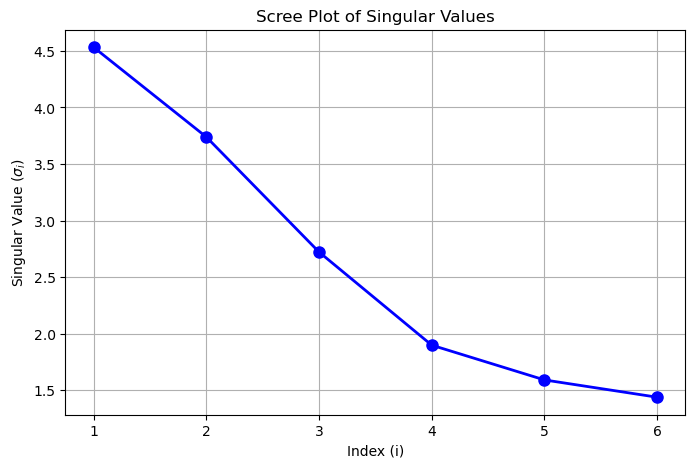

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set a seed for reproducibility (optional, but good for debugging)
np.random.seed(42)
# 1. Construct any non-square matrix A (m x n)
m = 10
n = 6

A = np.random.randn(m, n)

print(f"Matrix A created with shape: {A.shape}")
print("Matrix A:")
print(np.round(A, 2)) # Printing rounded values for cleaner output

# 2. Compute its SVD
# np.linalg.svd returns:
# U: The left singular vectors (orthogonal matrix, m x m)
# s: The singular values (1D vector), NOT the full diagonal matrix!
# Vt: The right singular vectors transposed (orthogonal matrix, n x n)
U, s, Vt = np.linalg.svd(A, full_matrices=True)

# Print shapes to understand the output [cite: 79]
print(f"Shape of U: {U.shape}")
print(f"Shape of singular values vector s: {s.shape}")
print(f"Shape of Vt: {Vt.shape}")

# To perform matrix multiplication A = U * Sigma * Vt, we must construct the full Sigma matrix.
# Sigma must have the same dimensions as A (m x n) to make the matrix multiplication valid.
# Source [cite: 80-82]: Implementation of constructing full Sigma matrix
Sigma = np.zeros((m, n))

# Fill the diagonal of the top n x n block with the singular values
# We use min(m, n) to handle cases where m < n or m > n, though here m > n.
k = min(m, n)
Sigma[:k, :k] = np.diag(s)

print(f"\nConstructed full Sigma matrix with shape: {Sigma.shape}")

# 3. Verify numerically that A ≈ U * Sigma * Vt

# Perform the matrix multiplication: U @ Sigma @ Vt
# The @ symbol is the operator for matrix multiplication in Python
A_reconstructed = U @ Sigma @ Vt

# Calculate the difference matrix
difference = A - A_reconstructed

# Calculate the Frobenius norm of the difference (Euclidean norm of the flattened matrix)
# Source[cite: 52]: The concept of minimizing norm distance
frobenius_error = np.linalg.norm(difference, ord='fro')

# Check if the matrices are close within a small tolerance (floating point precision)
is_close = np.allclose(A, A_reconstructed)

print(f"Reconstruction Error (Frobenius Norm): {frobenius_error}")
print(f"Is the reconstruction effectively zero? {np.isclose(frobenius_error, 0)}")
print(f"Does np.allclose agree? {is_close}")

# 4. Print and plot the singular values
print("Singular Values (sigma):", s)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(s) + 1), s, 'bo-', linewidth=2, markersize=8)
plt.title('Scree Plot of Singular Values')
plt.xlabel('Index (i)')
plt.ylabel('Singular Value ($\sigma_i$)')
plt.grid(True)
plt.xticks(range(1, len(s) + 1))
plt.show()